# Data Reading

Data source- keras.datasets

In [199]:
import numpy as np

In [200]:
#Reading Data from Keras
from keras.datasets import mnist
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

In [201]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)
print(Ytrain)#[0:5])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 ... 5 6 8]


Indicates,
- 60000- no of images for training
- 28 & 28- Pixel Size of image
- 10000 - no of images for testing 

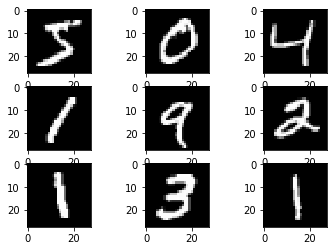

In [202]:
from matplotlib import pyplot  
# plot first few images

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(Xtrain[i], cmap=pyplot.get_cmap('gray'))
  
# show the figure
pyplot.show()

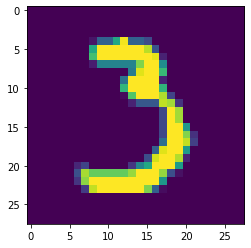

In [203]:
pyplot.imshow(Xtrain[330,:,:])
pyplot.show()

# Data Prepration

In [204]:
#Reshaping from 2D to 4D
Xtrain=np.reshape(Xtrain,(60000,28,28,1)) #1st method 
print("Xtrain_Shape",Xtrain.shape)
Xtest=Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1) # 2nd method
print("Xtest_Shape",Xtest.shape)

Xtrain_Shape (60000, 28, 28, 1)
Xtest_Shape (10000, 28, 28, 1)


## Normallization
#### Why we always divide RGB values by 255?

- RGB (Red, Green, Blue) are 8 bit each.
- The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
- The combination range is 256*256*256.
- By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

In [205]:
#for precison-to improve the numerical precision, the dataset p is normalized by centering it at a zero mean
Xtrain=Xtrain.astype('float')
Xtest=Xtest.astype('float')

#Normailize the data 
Xtrain=Xtrain/255
Xtest=Xtest/255

In [206]:
print("Xtrain_Shape",Xtrain.shape)

Xtrain_Shape (60000, 28, 28, 1)


In [207]:
#from keras.utils import to_categorical
import keras
Ytrain=keras.utils.to_categorical(Ytrain)
print(Ytrain.shape)
Ytest=keras.utils.to_categorical(Ytest)
print(Ytest.shape)

(60000, 10)
(10000, 10)


# Choose the Model:CNN


In [208]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D,Flatten,Dense
model = Sequential()
model.add(Conv2D(8,(5,5),padding="valid",strides=1,name="Conv1",activation="relu",input_shape=(28,28,1)))
#practice model.add(Conv2D(8,(2,2),padding="valid",strides=1,name="Conv2"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8,(5,5),padding="valid",strides=1,name="Conv2",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation ="softmax"))

In [209]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 8)           1608      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)               

## Model Compile
- **optimizer="rmsprop"**#adam for binary classification,rmsprop for multiclassification & regression, 
- **loss=None**#binary_crossentropy, categorical_crossentropy, MSE/RSME for regression
- **metrics=None**#accuracy for classification,mae for regression,
- **loss_weights=None**
- **weighted_metrics=None**
- **run_eagerly=None**
- **steps_per_execution=None**#calculate then number from equation len(x_train) / batchsize else apply this eqn

In [210]:
model.compile(loss = keras.losses.categorical_crossentropy,optimizer = keras.optimizers.Adadelta(),metrics =['accuracy'])

## Model fit
- Data Augmentation is a method of artificially creating a new dataset for training from the existing training dataset to improve the performance of deep learning neural networks with the amount of data available. It is a form of regularization which makes our model generalize better than before.
- fit is used when the entire training dataset can fit into the memory and no data augmentation is applied
- fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied

**When we call the .fit_generator() function it makes assumptions:**

- Keras is first calling the generator function(dataAugmentaion)
- Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.
- our .fit_generator() function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
- For the number of epochs specified(10 in our case) the process is repeated.

In [218]:
### constant
"""
fit={object=model,
     x = NULL, y = NULL,#training data
     batch_size = 32,NULL,#it can take any integer value or NULL and by default, it will be set to 32. It specifies no. of samples per gradient.
     epochs = 10,#an integer and number of epochs we want to train our model for
     verbose = getOption("keras.fit_verbose", default = 1),#specifies verbosity mode(0 = silent, 1= progress bar, 2 = one line per epoch).
     validation_split = 0, validation_data = NULL,
     ------------------------------------------
     callbacks = NULL,
     view_metrics = getOption("keras.view_metrics",default = "auto"),
     shuffle = TRUE,
     class_weight = NULL,
     sample_weight = NULL,
     initial_epoch = 0, steps_per_epoch = NULL, validation_steps = NULL}

imagedatagen={featurewise_center=True,#Boolean. Set input mean to 0 over the dataset, feature-wise.
              featurewise_std_normalization=True,#Boolean. Divide inputs by std of the dataset, feature-wise.
              rotation_range = 20,
              horizontal_flip = True,#Boolean. Randomly flip inputs horizontally.
              width_shift_range = 0.2,
              height_shift_range = 0.2
              -------------------------------
              zoom_range = 0.20, 
              fill_mode = "nearest",#One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'
              shear_range = 0.20,
              brightness_range
              shear_range
              zoom_range
              channel_shift_range
              fill_mode
              cval
              rescale#rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided
              preprocessing_function#function that will be applied on each input. 
              validation_split#Float. Fraction of images reserved for validation (strictly between 0 and 1).
              data_format
              samplewise_center=,#Boolean. Set each sample mean to 0.
              samplewise_std_normalization=,
              zca_whitening,
              zca_epsilon
              dtype}

fitgenerator={epoch,
              steps_per_epoch=len(x_train) / batchsize
              validation_data
              verbose}
"""

'\nfit={object=model,\n     x = NULL, y = NULL,#training data\n     batch_size = 32,NULL,#it can take any integer value or NULL and by default, it will be set to 32. It specifies no. of samples per gradient.\n     epochs = 10,#an integer and number of epochs we want to train our model for\n     verbose = getOption("keras.fit_verbose", default = 1),#specifies verbosity mode(0 = silent, 1= progress bar, 2 = one line per epoch).\n     validation_split = 0, validation_data = NULL,\n     ------------------------------------------\n     callbacks = NULL,\n     view_metrics = getOption("keras.view_metrics",default = "auto"),\n     shuffle = TRUE,\n     class_weight = NULL,\n     sample_weight = NULL,\n     initial_epoch = 0, steps_per_epoch = NULL, validation_steps = NULL}\n\nimagedatagen={featurewise_center=True,#Boolean. Set input mean to 0 over the dataset, feature-wise.\n              featurewise_std_normalization=True,#Boolean. Divide inputs by std of the dataset, feature-wise.\n        

In [211]:
#Fit using fit generator

"""from keras.preprocessing.image import ImageDataGenerator
dataAugmentaion =ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,
                           horizontal_flip=True)

dataAugmentaion.fit(Xtrain)
it_train=dataAugmentaion.flow(Xtrain,Ytrain,batch_size=64)

#fits the model
steps=int(Xtrain.shape[0]/64)
history=model.fit_generator(it_train,steps_per_epoch=steps, epochs=2,validation_data=(Xtest,Ytest),verbose=1)"""
#evaluate model


'from keras.preprocessing.image import ImageDataGenerator\ndatagen=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,\n                           horizontal_flip=True)\n\ndatagen.fit(Xtrain)\nit_train=datagen.flow(Xtrain,Ytrain,batch_size=64)\n\n#fits the model\nsteps=int(Xtrain.shape[0]/64)\nhistory=model.fit_generator(it_train,steps_per_epoch=steps, epochs=2,validation_data=(Xtest,Ytest),verbose=1)'

In [212]:
History=model.fit(Xtrain,Ytrain,batch_size = 32,epochs =10,verbose= 1,validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 592us/step - loss: 0.2568 - accuracy: 0.9183 - val_loss: 0.0999 - val_accuracy: 0.9698
Epoch 2/10
48000/48000 [==============================] - 22s 453us/step - loss: 0.0924 - accuracy: 0.9716 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 3/10
48000/48000 [==============================] - 18s 379us/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0812 - val_accuracy: 0.9759
Epoch 4/10
48000/48000 [==============================] - 16s 335us/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 5/10
48000/48000 [==============================] - 19s 405us/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0606 - val_accuracy: 0.9829
Epoch 6/10
48000/48000 [==============================] - 18s 369us/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0587 - val_accuracy: 0.9836
Epoch 7/10
48000/48000 [==============================] 

In [213]:
model.evaluate(Xtest,Ytest)

10000/10000 [==============================] - 2s 205us/step


[0.04564486822984181, 0.9865999817848206]

without fit generator: test accuracy is 98%

In [214]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04564486822984181
Test accuracy: 0.9865999817848206


In [215]:
prediction=model.predict_classes(Xtest[156:157])
prediction

array([6], dtype=int64)

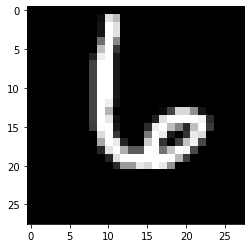

In [216]:
import pylab as plt

plt.imshow(Xtest[156:157].reshape(28,28),cmap='gray')
plt.show()

In [217]:
prediction2 = model.predict(Xtest[156:157])
print('Prediction Score:\n',prediction2[0])
thresholded = (prediction2>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [8.7064144e-08 2.4988265e-14 1.1675271e-11 7.0014862e-12 1.9259589e-07
 6.2155628e-08 9.9999964e-01 6.4415102e-13 2.7879668e-10 2.4925934e-12]

Thresholded Score:
 [0 0 0 0 0 0 1 0 0 0]

Predicted Digit:
 6
